In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

In [32]:
file = "/Users/lucasmazza/Desktop/titanic/titanic/train.csv"
dataSet = pd.read_csv(file)
dataSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age missing values 177
Cabin missing values 687
Embarked missing values 2


/var/folders/53/4p87s2n96z5dbnsg5j3wbs780000gn/T/ipykernel_32167/2209703758.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataSet.corr(), vmin=-1, vmax=1, annot=True)


<AxesSubplot: >

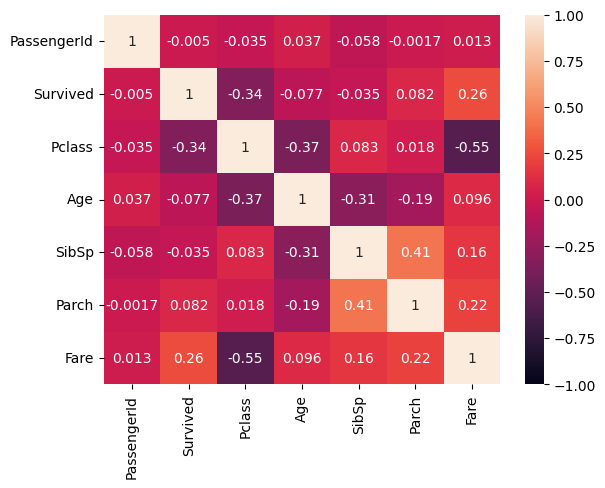

In [34]:
#how to best handle NAN values
dataSet.isna().sum().sum()
print("Age missing values " + str(dataSet.Age.isna().sum()))
print("Cabin missing values " + str(dataSet.Cabin.isna().sum()))
print("Embarked missing values " + str(dataSet.Embarked.isna().sum()))
#age and cabin have the highest amount of missing data 
#find what category has heights correlation with age
sns.heatmap(dataSet.corr(), vmin=-1, vmax=1, annot=True)
#pclass and age seem to have the highest correalation 

In [35]:
#resource: 
dataPclass = dataSet.groupby(by='Pclass').mean()
display(dataPclass)
#we can resample age based off the mean of samples taken from the same pclass category 
dataSet['Age'] = dataSet.groupby('Pclass')['Age'].transform(lambda x : x.fillna(x.mean()))

/var/folders/53/4p87s2n96z5dbnsg5j3wbs780000gn/T/ipykernel_32167/2162038882.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataPclass = dataSet.groupby(by='Pclass').mean()


,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [36]:
#lets explore filling in the gaps for the cabin data
#I considered rencoding the column, and then going from there but there is just alot of missing data
#lets find how much of the cabin data is missing

print("Percentage of the cabin data missing  = " + str(dataSet.Cabin.isna().sum()/len(dataSet)))
#.77% missing is just going to be hard to work with I think, we can drop it 
dataSet = dataSet.drop(['Cabin'], axis = 1)

Percentage of the cabin data missing  = 0.7710437710437711


array(['S', 'C', 'Q'], dtype=object)

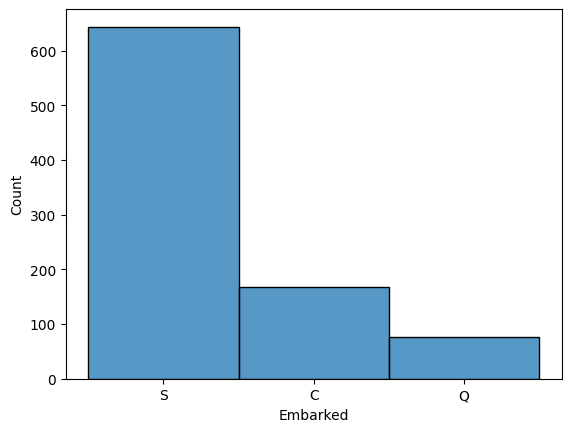

In [45]:
#Embarked is the missing data
#How many values do we have missing?
    #2 values 
#to me it is not worth my time to do an analysis for two missing values 
#going to use upsampling to replace missing values
sns.histplot(data = dataSet['Embarked'])
#lets fill in the missing for Q, since they have the smallest about of samples just to give more exposure 

dataSet['Embarked'].fillna(value='Q', inplace = True)
#now we have taken care of all missing values in the dataset


In [58]:
#now we need to sort out having string values in some categories, 
#when we go to do logistic regression, that wont be super helpful
dataSet.info()
#we need to reincode Name, sex, Ticket, embarked 
dataSet['Sex'].replace(dataSet['Sex'].unique(),
                        range(len(dataSet['Sex'].unique())), inplace=True)
dataSet['Name'].replace(dataSet['Name'].unique(),
                        range(len(dataSet['Name'].unique())), inplace=True)
dataSet['Ticket'].replace(dataSet['Ticket'].unique(),
                        range(len(dataSet['Ticket'].unique())), inplace=True)
dataSet['Embarked'].replace(dataSet['Embarked'].unique(),
                        range(len(dataSet['Embarked'].unique())), inplace=True)
                        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [59]:
#want to split the data into training and test
#we will use 30% of the data as validation 
X = dataSet.drop(['Survived'], axis = 1)
y = dataSet['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.3, random_state= 1)

In [61]:
#we are going to try and use logistic regression model here 
logisticModel = LogisticRegression()
logisticModel.fit(X_train, y_train)
score = logisticModel.score(X_val, y_val)
print(score)

0.7649253731343284


/Users/lucasmazza/opt/anaconda3/envs/PythonFrameWork/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


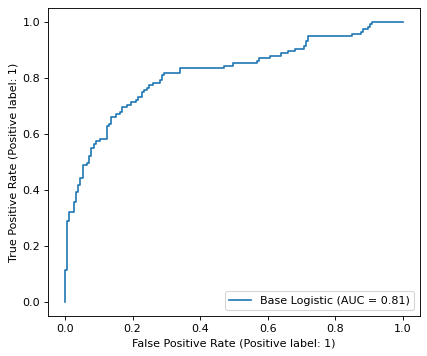

In [65]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=80)
RocCurveDisplay.from_estimator(logisticModel, X_val, y_val, ax=ax, name='Base Logistic')
plt.show()
#PROJECT IS STILL IN PROGRESS